In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [65]:
import numpy as np
import pandas as pd
 
df = pd.read_csv('diabetes.csv')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum()) 

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [67]:
#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum()) 

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [68]:
print(df.eq(0).sum()) 

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [69]:
corr = df.corr()['Outcome'].sort_values()
print(corr) 

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64


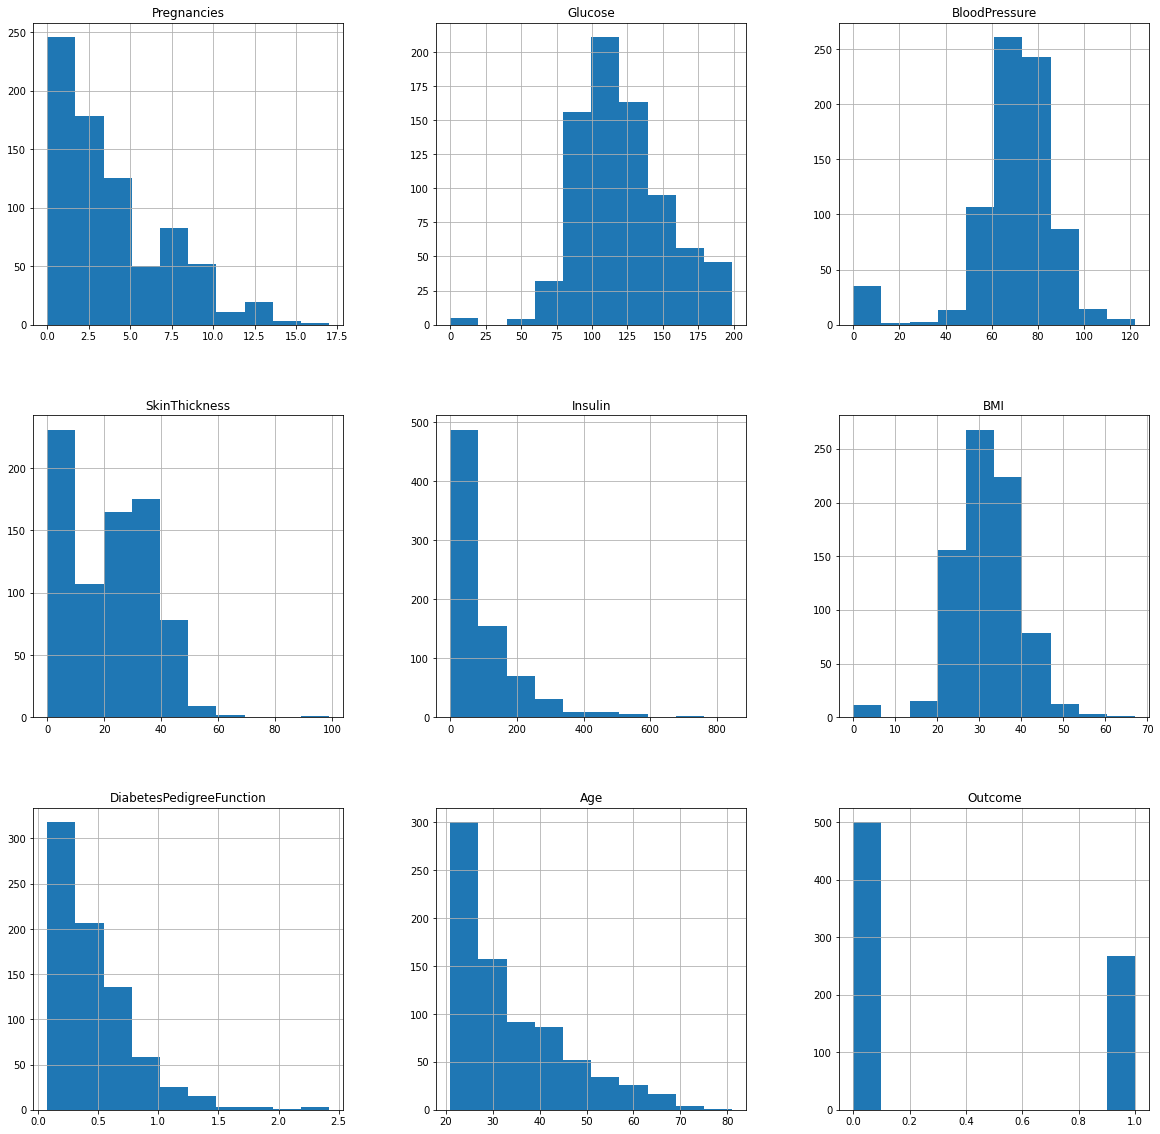

In [71]:
his = df.hist(figsize = (20,20))

plotting correlation between feature

In [73]:
corr = df.corr()
print(corr) 

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


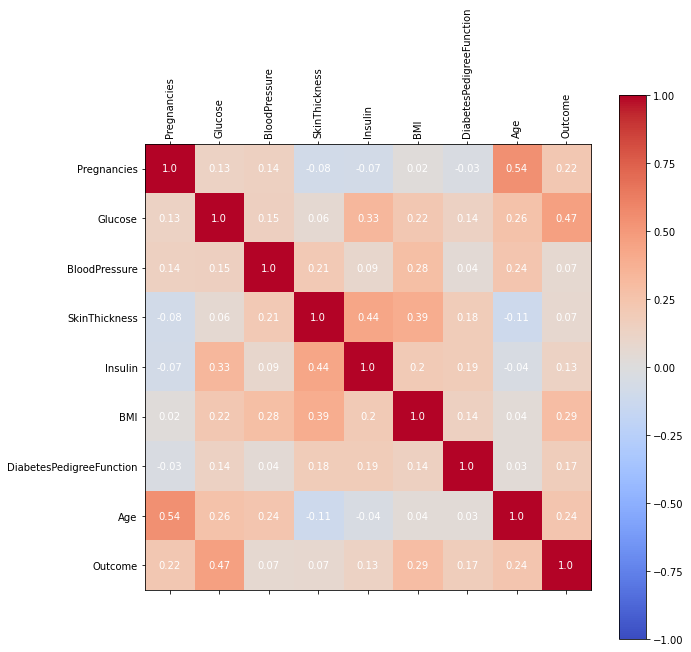

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(figsize=(10, 10))
cax     = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
 
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
 
ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)
 
ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)
 
#---print the correlation factor---
for i in range(df.shape[1]):
    for j in range(9):
        text = ax.text(j, i, round(corr.iloc[i][j],2),
                       ha="center", va="center", color="w")
plt.show()

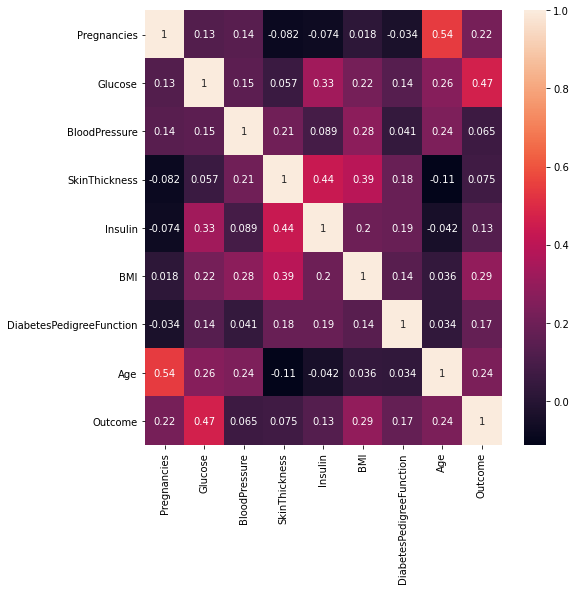

In [75]:
import seaborn as sns
 
sns.heatmap(df.corr(),annot=True)
 
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8) 

In [ ]:

#---get the top four features that has the highest correlation---
print(df.corr().nlargest(4, 'Outcome').index)

#---print the top 4 correlation values---
print(df.corr().nlargest(4, 'Outcome').values[:,1]) 

Evaluate the algorithm 

In [76]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
 
#---features---
X = df[['Glucose','BMI','Age']]
 
#---label---
y = df.iloc[:,8]
 
log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10,
scoring='accuracy').mean()
 
print(log_regress_score)

0.765704032809296


In [79]:
result = []
result.append(log_regress_score)

K-Neareast neighbour

In [80]:
from sklearn.neighbors import KNeighborsClassifier
 
#---empty list that will hold cv (cross-validates) scores---
cv_scores = []
 
#---number of folds---
folds = 10
 
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))
 
#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)
 
#---get the maximum score---
knn_score = max(cv_scores)
 
#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
 
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score) 

The optimal number of neighbors is 19
0.7669514695830485


Support vector

In [81]:
from sklearn import svm
 
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
                                   cv=10, scoring='accuracy').mean()
 
print(linear_svm_score)
result.append(linear_svm_score) 

0.7630724538619276


RBF kernel

In [82]:
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)

0.7617908407382091


Selecting best perform Algorithm

In [84]:
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM LinearKernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
K Nearest Neighbors,0.766951
Logistic Regression,0.765704
SVM LinearKernel,0.763072
SVM RBF Kernel,0.761791


Training and saving the model

In [85]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [87]:
import pickle
 
#---save the model to disk---
filename = 'diabetes.sav'
 
#---write to the file using write and binary mode---
pickle.dump(knn, open(filename, 'wb'))

In [88]:
#---load the model from disk---
loaded_model = pickle.load(open(filename, 'rb')) 

In [89]:
Glucose = 65
BMI = 70
Age = 50
 
prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if (prediction[0]==0):
    print("Non-diabetic")
else:
    print("Diabetic")

[0]
Non-diabetic


In [90]:
proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%") 

[[0.94736842 0.05263158]]
Confidence: 94.74%


In [92]:
!pip install flask

In [ ]:
import pickle
from flask import Flask, request, json, jsonify
import numpy as np
 
app = Flask(__name__)
 
#---the filename of the saved model---
filename = 'diabetes.sav'
 
#---load the saved model---
loaded_model = pickle.load(open(filename, 'rb'))
 
@app.route('/diabetes/v1/predict', methods=['POST'])
def predict():
    #---get the features to predict---
    features = request.json
 
    #---create the features list for prediction---
    features_list = [features["Glucose"],
                     features["BMI"],
                     features["Age"]]
 
    #---get the prediction class---
    prediction = loaded_model.predict([features_list])
 
    #---get the prediction probabilities---
    confidence = loaded_model.predict_proba([features_list])
 
    #---formulate the response to return to client---
    response = {}
    response['prediction'] = int(prediction[0])
    response['confidence'] = str(round(np.amax(confidence[0]) * 100 ,2))
 
    return  jsonify(response)
 
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)